In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = 'LLMResponses.csv'  # CSV file path
# file_path = 'LLM_Responses.csv'  # CSV file path
data = pd.read_csv(file_path, encoding='latin1')  # try 'iso-8859-1' or 'cp1252' if 'latin1' doesn't work

In [4]:
# Display the first few rows of the dataset
print("Dataset Preview:")
display(data.head())


Dataset Preview:


,Timestamp,LLM Name,Prompt,Response
0,31/05/24 15:41,ChatGPT,Give me the top three things to consider when ...,"When writing your climate action plan, here ar..."
1,31/05/24 15:42,GeminiAI,Give me the top three things to consider when ...,Here are the top three things to consider when...
2,31/05/24 15:43,Claude AI,Give me the top three things to consider when ...,"When writing your climate action plan, the top..."
3,31/05/24 15:44,Perplexity AI,Give me the top three things to consider when ...,"When writing a climate action plan, the top th..."
4,31/05/24 15:45,Meta AI,Give me the top three things to consider when ...,Here are the top three things to consider when...


In [5]:
# Check for missing values
print("\nMissing Values in Dataset:")
display(data.isnull().sum())


Missing Values in Dataset:


Timestamp    24
LLM Name     24
Prompt       24
Response     24
dtype: int64

In [7]:
# Filter data for a single prompt
prompt = "Give me the top three things to consider when writing my climate action plan."
# prompt = "How can low income residents in mobile homes in phoenix, overcome extreme heat in their homes?"
filtered_data = data[data['Prompt'] == prompt]

In [8]:
# Display the filtered data
print("\nFiltered Data for the given Prompt:")
display(filtered_data)


Filtered Data for the given Prompt:


,Timestamp,LLM Name,Prompt,Response
0,31/05/24 15:41,ChatGPT,Give me the top three things to consider when ...,"When writing your climate action plan, here ar..."
1,31/05/24 15:42,GeminiAI,Give me the top three things to consider when ...,Here are the top three things to consider when...
2,31/05/24 15:43,Claude AI,Give me the top three things to consider when ...,"When writing your climate action plan, the top..."
3,31/05/24 15:44,Perplexity AI,Give me the top three things to consider when ...,"When writing a climate action plan, the top th..."
4,31/05/24 15:45,Meta AI,Give me the top three things to consider when ...,Here are the top three things to consider when...
5,31/05/24 15:46,HuggingChat,Give me the top three things to consider when ...,"When writing a Climate Action Plan (CAP), here..."


In [9]:
# Basic Statistics
print("\nBasic Statistics:")
print("Number of Responses per LLM:")
response_counts = filtered_data['LLM Name'].value_counts()
display(response_counts)


Basic Statistics:
Number of Responses per LLM:


LLM Name
ChatGPT          1
GeminiAI         1
Claude AI        1
Perplexity AI    1
Meta AI          1
HuggingChat      1
Name: count, dtype: int64

In [10]:
# Function to compute response length
def response_length(response):
    return len(response.split())

In [11]:
# Adding response length to the dataset
filtered_data['Response Length'] = filtered_data['Response'].apply(response_length)

/var/folders/b9/n1_cfls9543_vvd9ybfqqlx40000gn/T/ipykernel_1881/1782584861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Response Length'] = filtered_data['Response'].apply(response_length)


In [12]:
# Summary Statistics
print("\nSummary Statistics of Response Length:")
display(filtered_data.groupby('LLM Name')['Response Length'].describe())



Summary Statistics of Response Length:


,count,mean,std,min,25%,50%,75%,max
LLM Name,,,,,,,,
ChatGPT,1.0,174.0,NaN,174.0,174.0,174.0,174.0,174.0
Claude AI,1.0,233.0,NaN,233.0,233.0,233.0,233.0,233.0
GeminiAI,1.0,164.0,NaN,164.0,164.0,164.0,164.0,164.0
HuggingChat,1.0,220.0,NaN,220.0,220.0,220.0,220.0,220.0
Meta AI,1.0,144.0,NaN,144.0,144.0,144.0,144.0,144.0
Perplexity AI,1.0,145.0,NaN,145.0,145.0,145.0,145.0,145.0


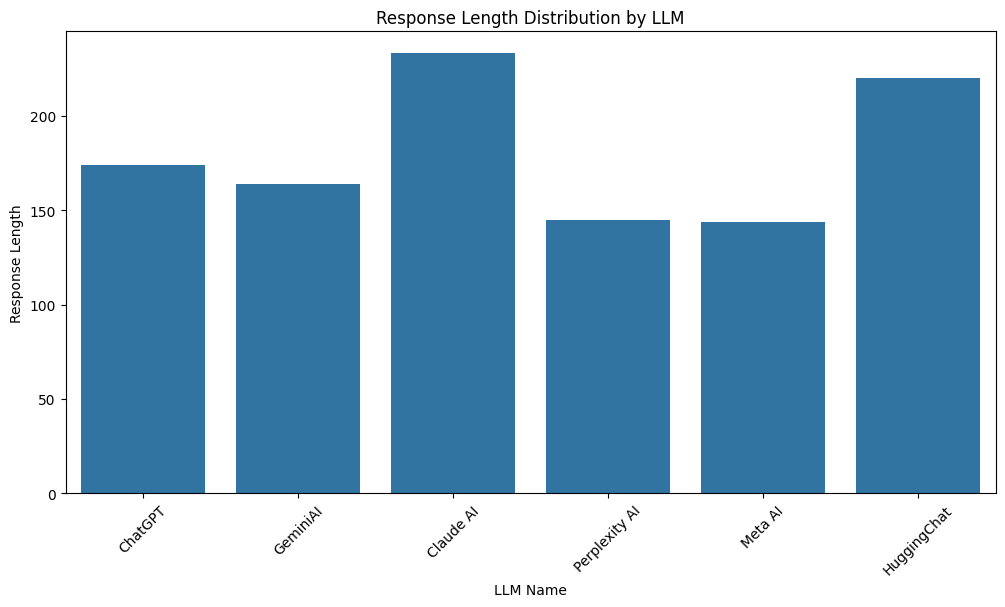

In [14]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='LLM Name', y='Response Length', data=filtered_data)
plt.title('Response Length Distribution by LLM')
plt.xlabel('LLM Name')
plt.ylabel('Response Length')
plt.xticks(rotation=45)
plt.show()


Summary Statistics of Sentiment Polarity:


/var/folders/b9/n1_cfls9543_vvd9ybfqqlx40000gn/T/ipykernel_1881/821381900.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Sentiment Polarity'] = filtered_data['Response'].apply(sentiment_polarity)


,count,mean,std,min,25%,50%,75%,max
LLM Name,,,,,,,,
ChatGPT,1.0,0.186859,NaN,0.186859,0.186859,0.186859,0.186859,0.186859
Claude AI,1.0,0.089931,NaN,0.089931,0.089931,0.089931,0.089931,0.089931
GeminiAI,1.0,0.211520,NaN,0.211520,0.211520,0.211520,0.211520,0.211520
HuggingChat,1.0,0.090625,NaN,0.090625,0.090625,0.090625,0.090625,0.090625
Meta AI,1.0,0.151020,NaN,0.151020,0.151020,0.151020,0.151020,0.151020
Perplexity AI,1.0,0.055723,NaN,0.055723,0.055723,0.055723,0.055723,0.055723


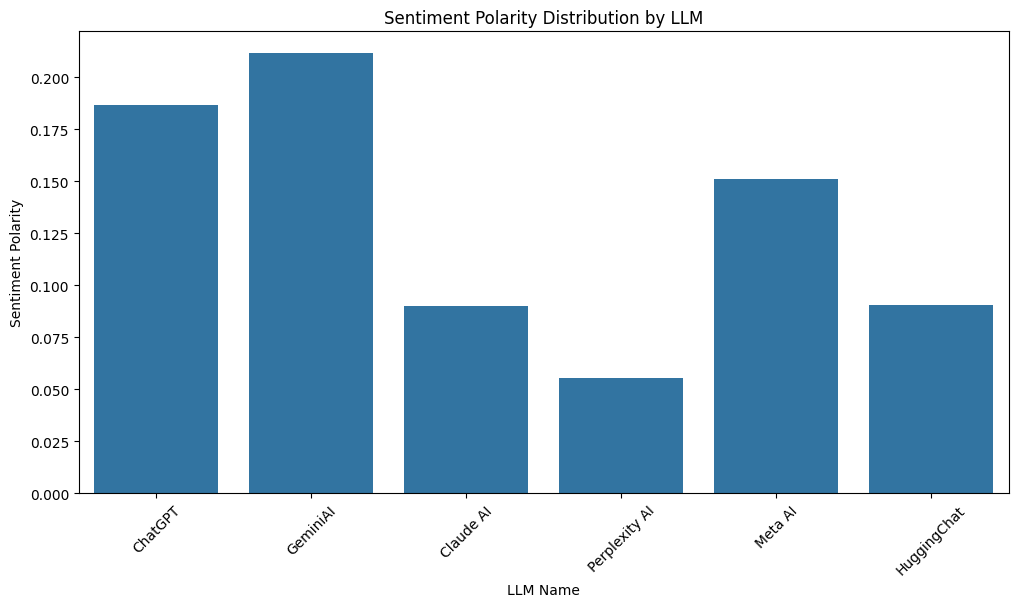

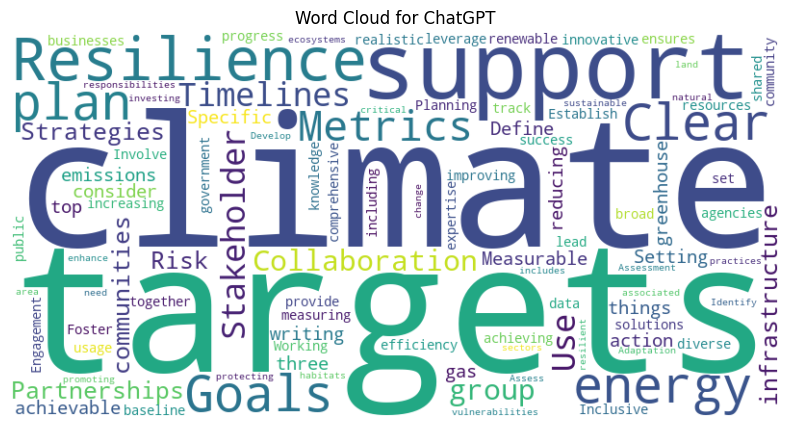

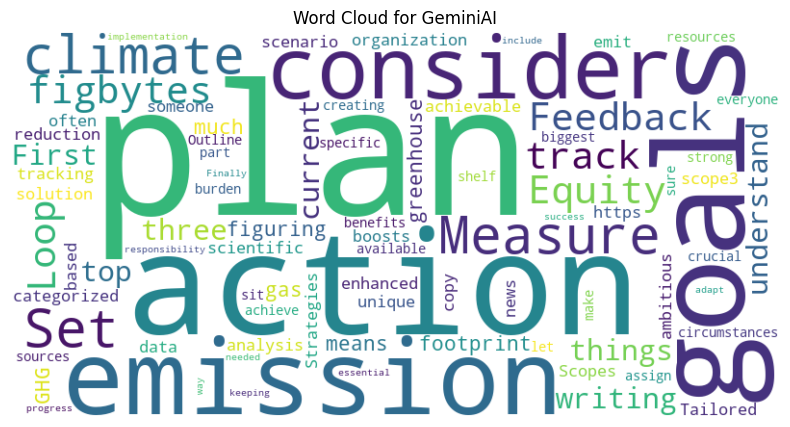

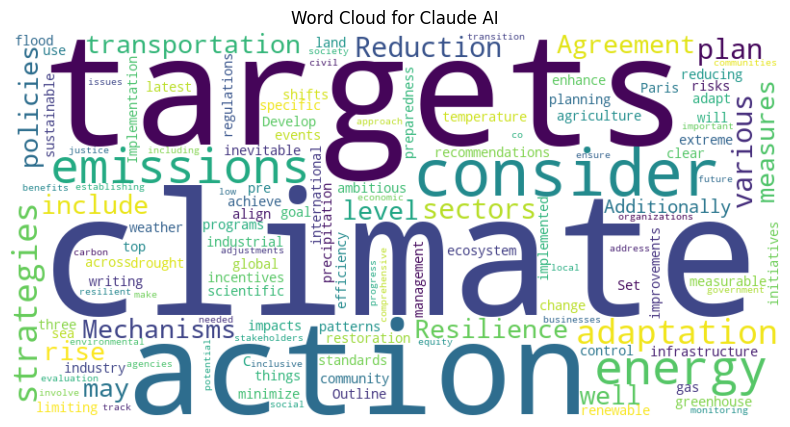

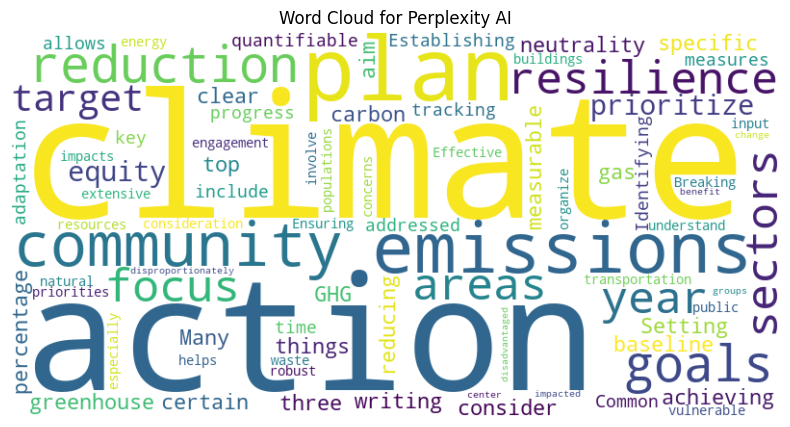

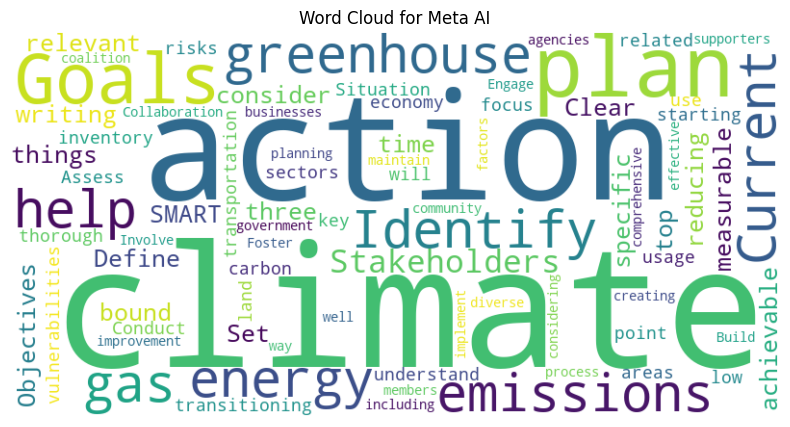

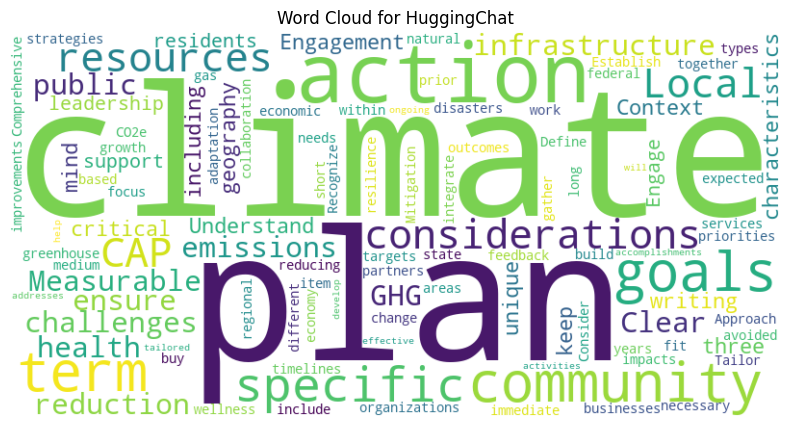

In [15]:
# Sentiment Analysis (Optional, requires TextBlob)
from textblob import TextBlob

# Function to compute sentiment polarity
def sentiment_polarity(response):
    return TextBlob(response).sentiment.polarity

# Adding sentiment polarity to the dataset
filtered_data['Sentiment Polarity'] = filtered_data['Response'].apply(sentiment_polarity)

# Summary Statistics for Sentiment Polarity
print("\nSummary Statistics of Sentiment Polarity:")
display(filtered_data.groupby('LLM Name')['Sentiment Polarity'].describe())

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='LLM Name', y='Sentiment Polarity', data=filtered_data)
plt.title('Sentiment Polarity Distribution by LLM')
plt.xlabel('LLM Name')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45)
plt.show()

# Word Cloud Visualization (Optional, requires WordCloud)
from wordcloud import WordCloud

# Generate and plot word clouds for each LLM
llm_names = filtered_data['LLM Name'].unique()
for llm in llm_names:
    llm_responses = ' '.join(filtered_data[filtered_data['LLM Name'] == llm]['Response'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(llm_responses)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {llm}')
    plt.axis('off')
    plt.show()

In [16]:
import numpy as np

def calculate_perplexity(text, model):
    """
    Calculate the perplexity of a given text using a language model.
    """
    # Tokenize the text
    tokens = model.tokenize(text)
    N = len(tokens)
    
    # Calculate the log probability of the text
    log_prob = model.log_probability(tokens)
    
    # Calculate perplexity
    perplexity = np.exp(-log_prob / N)
    return perplexity


In [17]:
from nltk.translate.bleu_score import sentence_bleu

def calculate_bleu(reference, hypothesis):
    """
    Calculate the BLEU score between a reference and a hypothesis.
    """
    reference_tokens = reference.split()
    hypothesis_tokens = hypothesis.split()
    score = sentence_bleu([reference_tokens], hypothesis_tokens)
    return score


In [18]:
from rouge import Rouge

def calculate_rouge(reference, hypothesis):
    """
    Calculate the ROUGE score between a reference and a hypothesis.
    """
    rouge = Rouge()
    scores = rouge.get_scores(hypothesis, reference)
    return scores

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(text1, text2):
    """
    Calculate the cosine similarity between two texts.
    """
    vectorizer = TfidfVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    cosine_sim = cosine_similarity(vectors)
    return cosine_sim[0, 1]

In [20]:
def calculate_distinct_n(text, n):
    """
    Calculate the distinct-n score for a given text.
    """
    tokens = text.split()
    ngrams = set(zip(*[tokens[i:] for i in range(n)]))
    return len(ngrams) / len(tokens)

In [21]:
from sklearn.metrics import f1_score

def calculate_f1_score(true_labels, predicted_labels):
    """
    Calculate the F1 score between true labels and predicted labels.
    """
    score = f1_score(true_labels, predicted_labels, average='weighted')
    return score


Evaluation Metrics:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/var/folders/b9/n1_cfls9543_vvd9ybfqqlx40000gn/T/ipykernel_1881/1639515818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,LLM Name,BLEU Score,ROUGE Score,Cosine Similarity,Distinct-1,Distinct-2
0,ChatGPT,2.452613e-155,0.114650,0.393356,0.775862,0.994253
1,GeminiAI,2.074504e-155,0.095238,0.200525,0.756098,0.975610
2,Claude AI,4.449670e-79,0.106383,0.350240,0.712446,0.965665
3,Perplexity AI,2.802095e-155,0.171875,0.324287,0.731034,0.944828
4,Meta AI,3.277934e-02,0.223881,0.411489,0.763889,0.958333
5,HuggingChat,2.180526e-155,0.076087,0.336983,0.727273,0.968182


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/var/folders/b9/n1_cfls9543_vvd9ybfqqlx40000gn/T/ipykernel_1881/1639515818.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 


Evaluation Metrics:


/var/folders/b9/n1_cfls9543_vvd9ybfqqlx40000gn/T/ipykernel_1881/1639515818.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ROUGE Score'] = filtered_data['Response'].apply(lambda x: calculate_rouge(reference_response, x)[0]['rouge-l']['f'])  # Using ROUGE-L F1 score
/var/folders/b9/n1_cfls9543_vvd9ybfqqlx40000gn/T/ipykernel_1881/1639515818.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cosine Similarity'] = filtered_data['Response'].apply(lambda x: calculate_cosine_si

,LLM Name,BLEU Score,ROUGE Score,Cosine Similarity,Distinct-1,Distinct-2
0,ChatGPT,2.452613e-155,0.114650,0.393356,0.775862,0.994253
1,GeminiAI,2.074504e-155,0.095238,0.200525,0.756098,0.975610
2,Claude AI,4.449670e-79,0.106383,0.350240,0.712446,0.965665
3,Perplexity AI,2.802095e-155,0.171875,0.324287,0.731034,0.944828
4,Meta AI,3.277934e-02,0.223881,0.411489,0.763889,0.958333
5,HuggingChat,2.180526e-155,0.076087,0.336983,0.727273,0.968182



F1 Score: 0.3333333333333333


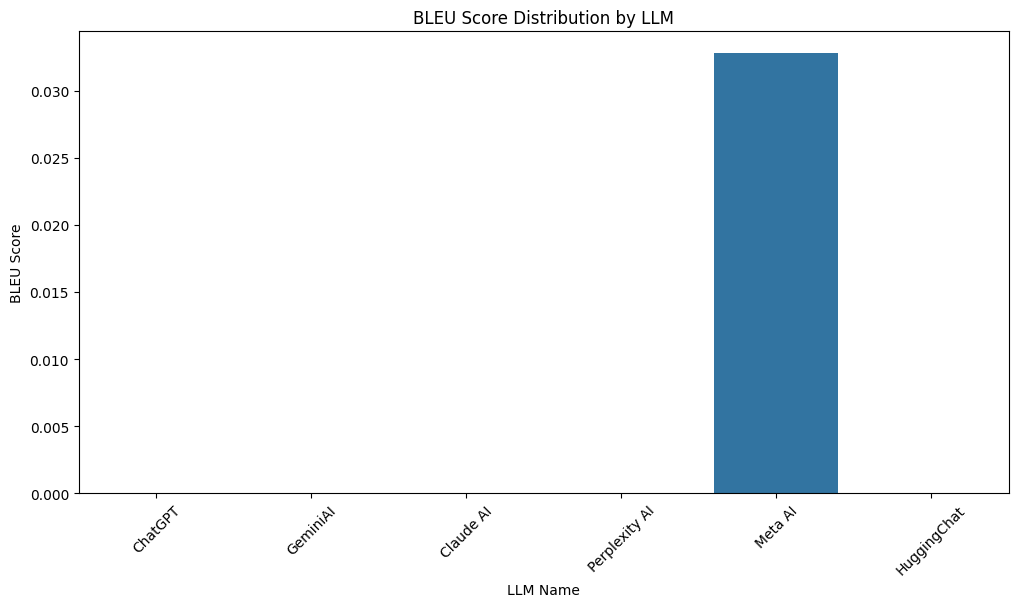

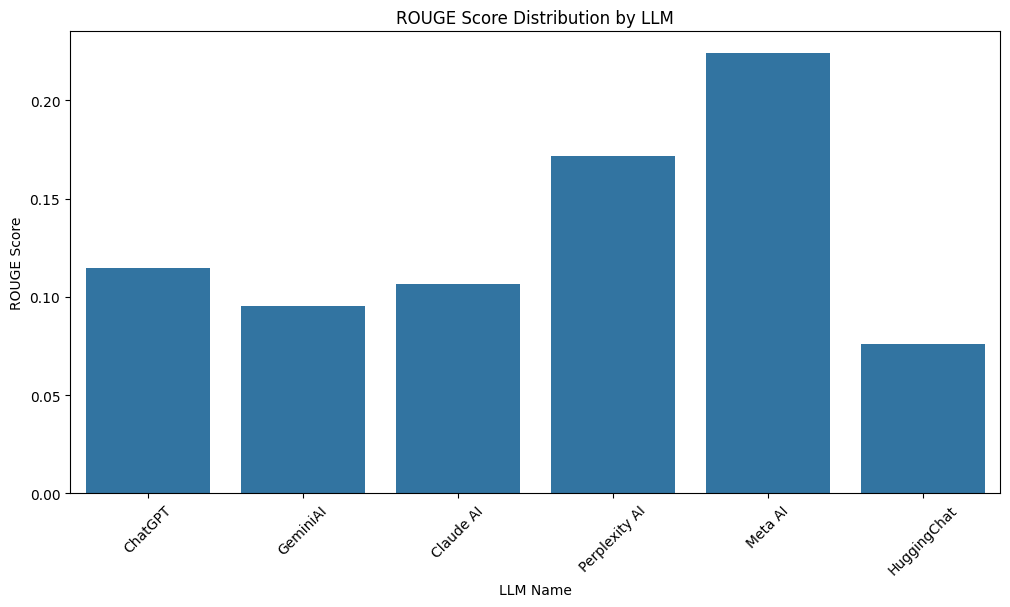

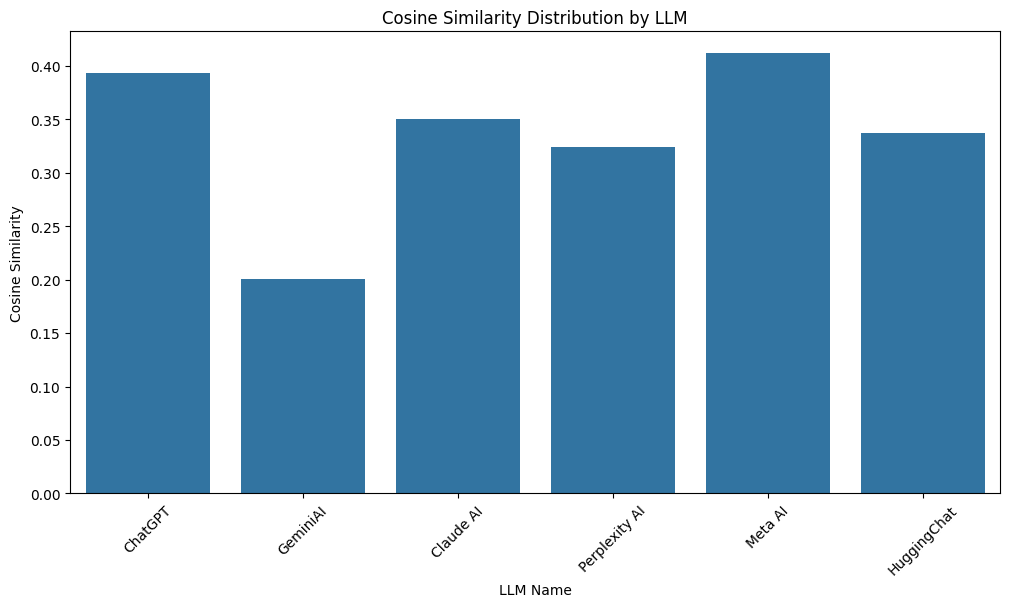

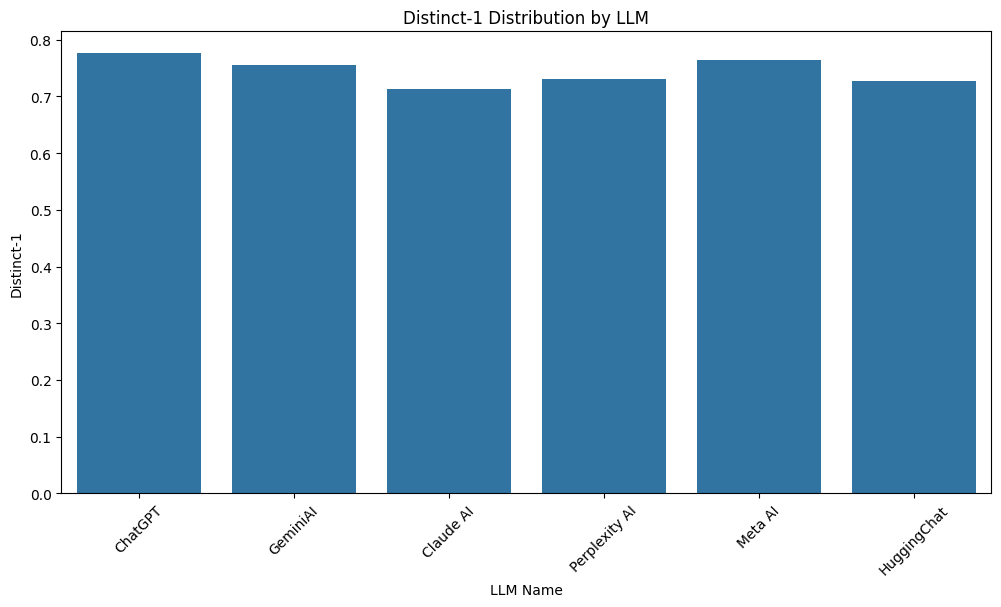

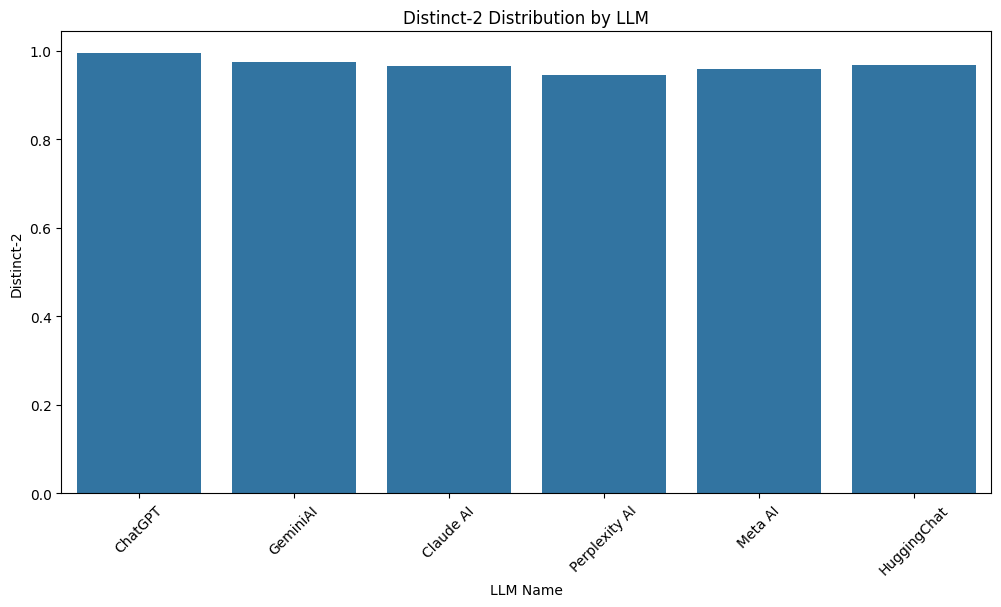

In [23]:
# Assuming we have a reference response for the given prompt
reference_response = "1. Assess current greenhouse gas emissions and set clear targets. 2. Identify key sectors for action and prioritize measures. 3. Engage stakeholders and ensure inclusive participation."

# Calculating evaluation metrics for each response in the filtered dataset
filtered_data['BLEU Score'] = filtered_data['Response'].apply(lambda x: calculate_bleu(reference_response, x))
filtered_data['ROUGE Score'] = filtered_data['Response'].apply(lambda x: calculate_rouge(reference_response, x)[0]['rouge-l']['f'])  # Using ROUGE-L F1 score
filtered_data['Cosine Similarity'] = filtered_data['Response'].apply(lambda x: calculate_cosine_similarity(reference_response, x))
filtered_data['Distinct-1'] = filtered_data['Response'].apply(lambda x: calculate_distinct_n(x, 1))
filtered_data['Distinct-2'] = filtered_data['Response'].apply(lambda x: calculate_distinct_n(x, 2))

# Display the calculated metrics
print("\nEvaluation Metrics:")
display(filtered_data[['LLM Name', 'BLEU Score', 'ROUGE Score', 'Cosine Similarity', 'Distinct-1', 'Distinct-2']])

# Assuming we have true sentiment labels and predicted sentiment labels for F1 score calculation
true_sentiments = [1, 0, 1, 0, 1]  # Example true sentiment labels (1: Positive, 0: Negative)
predicted_sentiments = filtered_data['Sentiment Polarity'].apply(lambda x: 1 if x > 0 else 0).tolist()

# Assuming we have a reference response for the given prompt
reference_response = "1. Assess current greenhouse gas emissions and set clear targets. 2. Identify key sectors for action and prioritize measures. 3. Engage stakeholders and ensure inclusive participation."

# Calculating evaluation metrics for each response in the filtered dataset
filtered_data['BLEU Score'] = filtered_data['Response'].apply(lambda x: calculate_bleu(reference_response, x))
filtered_data['ROUGE Score'] = filtered_data['Response'].apply(lambda x: calculate_rouge(reference_response, x)[0]['rouge-l']['f'])  # Using ROUGE-L F1 score
filtered_data['Cosine Similarity'] = filtered_data['Response'].apply(lambda x: calculate_cosine_similarity(reference_response, x))
filtered_data['Distinct-1'] = filtered_data['Response'].apply(lambda x: calculate_distinct_n(x, 1))
filtered_data['Distinct-2'] = filtered_data['Response'].apply(lambda x: calculate_distinct_n(x, 2))

# Display the calculated metrics
print("\nEvaluation Metrics:")
display(filtered_data[['LLM Name', 'BLEU Score', 'ROUGE Score', 'Cosine Similarity', 'Distinct-1', 'Distinct-2']])

# Assuming we have true sentiment labels and predicted sentiment labels for F1 score calculation
true_sentiments = [1, 0, 1, 0, 1, 0]  # Example true sentiment labels (1: Positive, 0: Negative)
predicted_sentiments = filtered_data['Sentiment Polarity'].apply(lambda x: 1 if x > 0 else 0).tolist()

# Calculate F1 score
f1 = calculate_f1_score(true_sentiments, predicted_sentiments)
print(f"\nF1 Score: {f1}")

# Visualizing the metrics
# Barplot for BLEU Score
plt.figure(figsize=(12, 6))
sns.barplot(x='LLM Name', y='BLEU Score', data=filtered_data)
plt.title('BLEU Score Distribution by LLM')
plt.xlabel('LLM Name')
plt.ylabel('BLEU Score')
plt.xticks(rotation=45)
plt.show()

# Barplot for ROUGE Score
plt.figure(figsize=(12, 6))
sns.barplot(x='LLM Name', y='ROUGE Score', data=filtered_data)
plt.title('ROUGE Score Distribution by LLM')
plt.xlabel('LLM Name')
plt.ylabel('ROUGE Score')
plt.xticks(rotation=45)
plt.show()

# Barplot for Cosine Similarity
plt.figure(figsize=(12, 6))
sns.barplot(x='LLM Name', y='Cosine Similarity', data=filtered_data)
plt.title('Cosine Similarity Distribution by LLM')
plt.xlabel('LLM Name')
plt.ylabel('Cosine Similarity')
plt.xticks(rotation=45)
plt.show()

# Barplot for Distinct-1
plt.figure(figsize=(12, 6))
sns.barplot(x='LLM Name', y='Distinct-1', data=filtered_data)
plt.title('Distinct-1 Distribution by LLM')
plt.xlabel('LLM Name')
plt.ylabel('Distinct-1')
plt.xticks(rotation=45)
plt.show()

# Barplot for Distinct-2
plt.figure(figsize=(12, 6))
sns.barplot(x='LLM Name', y='Distinct-2', data=filtered_data)
plt.title('Distinct-2 Distribution by LLM')
plt.xlabel('LLM Name')
plt.ylabel('Distinct-2')
plt.xticks(rotation=45)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


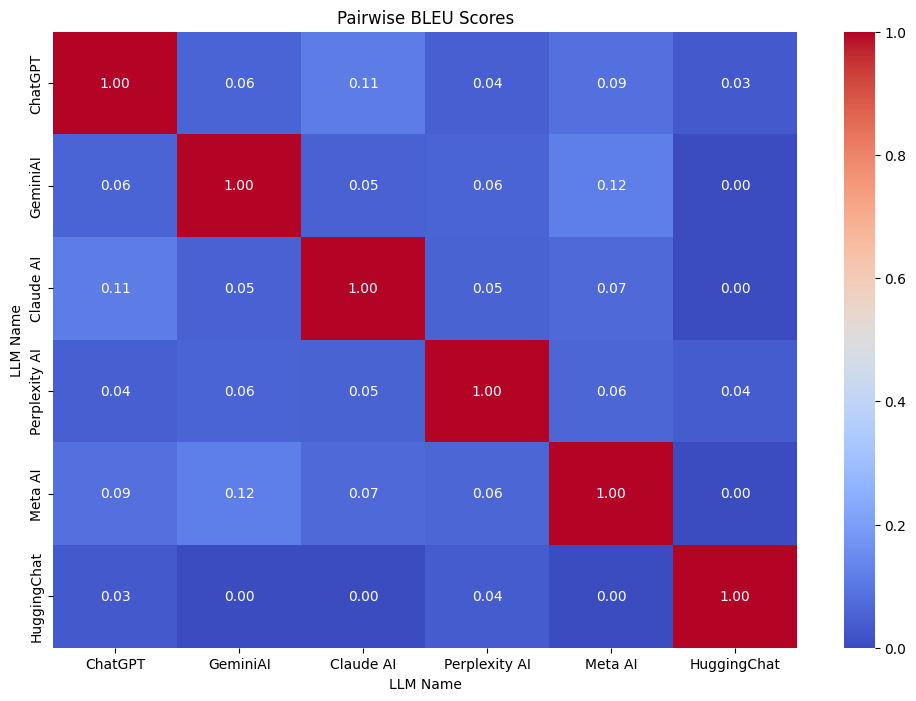

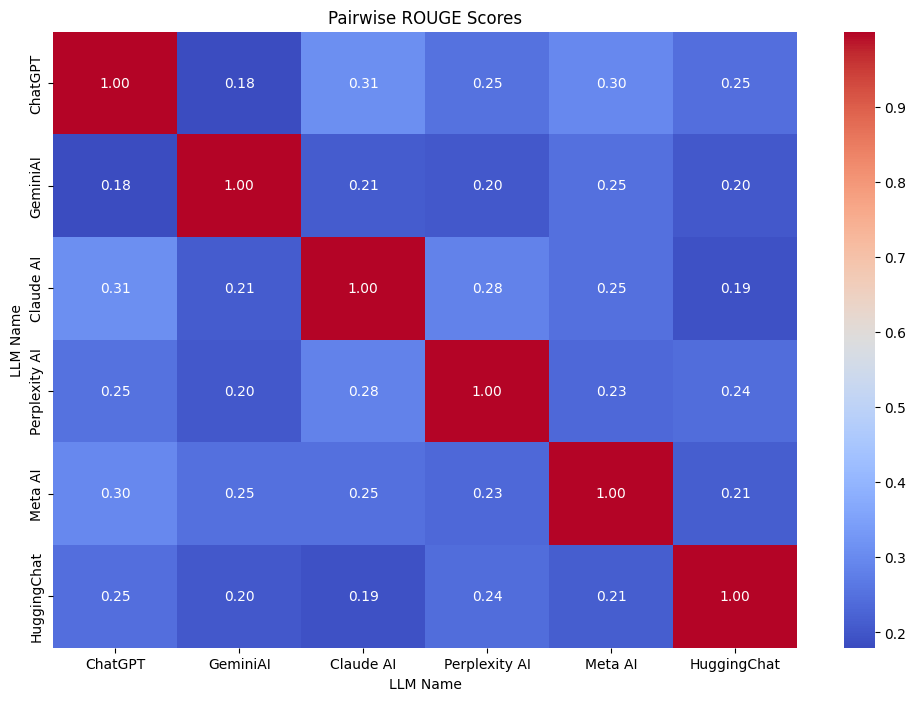

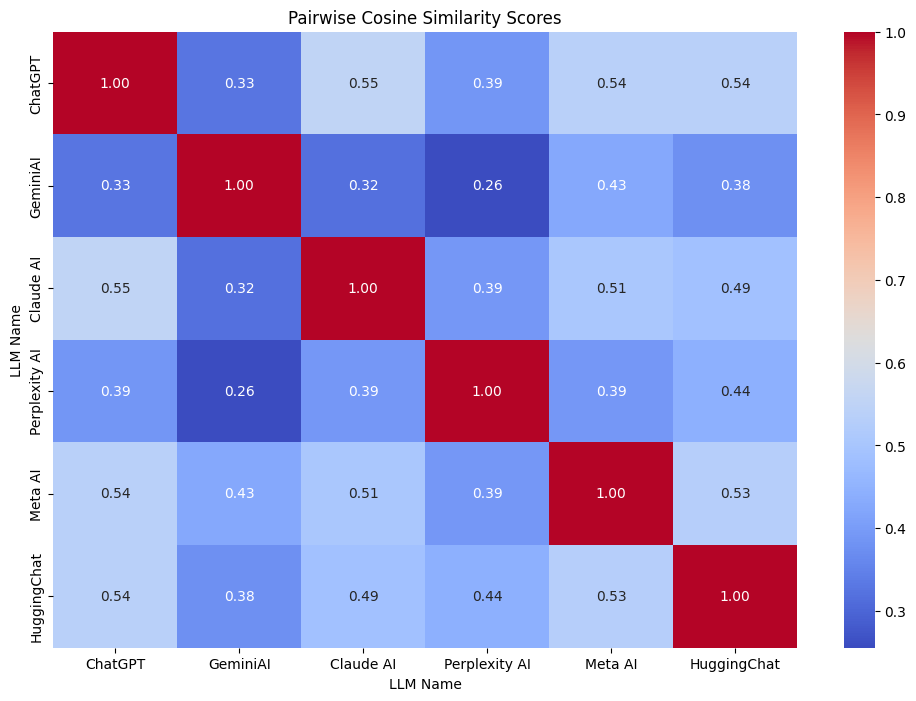

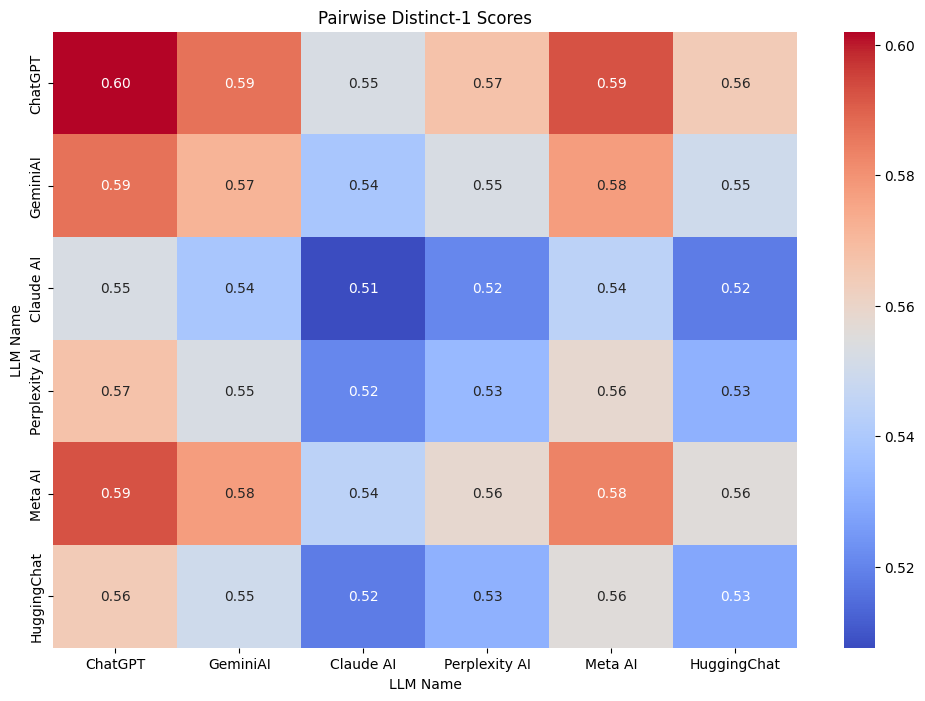

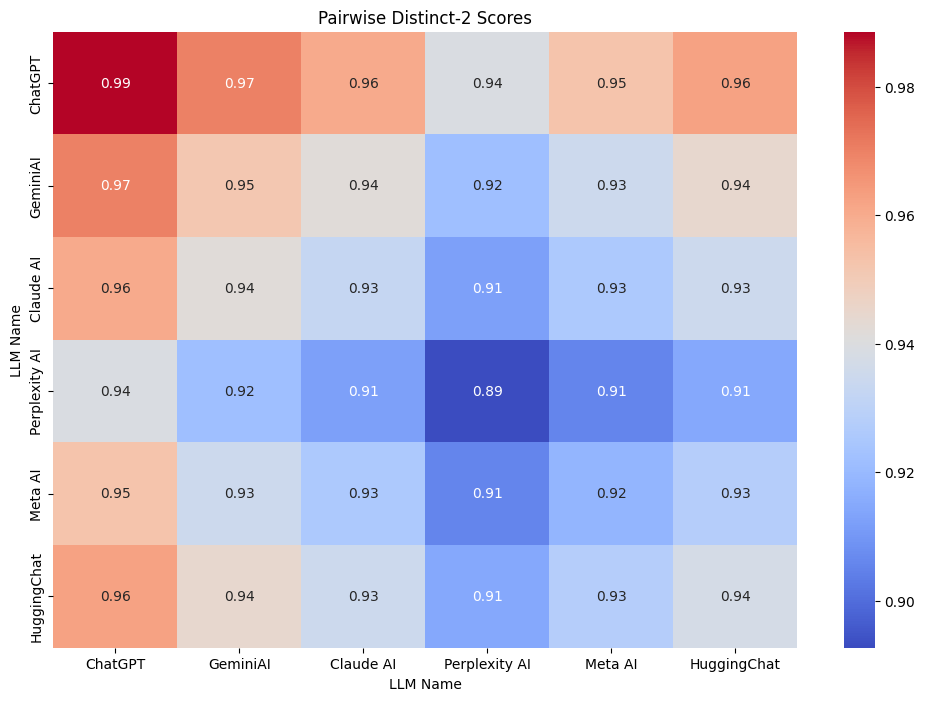

In [24]:
# Initialize Rouge for ROUGE score calculation
rouge = Rouge()

# Function to calculate pairwise BLEU scores
def calculate_pairwise_bleu(responses):
    num_responses = len(responses)
    scores = np.zeros((num_responses, num_responses))
    for i in range(num_responses):
        for j in range(i, num_responses):
            score = sentence_bleu([responses[i].split()], responses[j].split())
            scores[i, j] = score
            scores[j, i] = score
    return scores

# Function to calculate pairwise ROUGE scores
def calculate_pairwise_rouge(responses):
    num_responses = len(responses)
    scores = np.zeros((num_responses, num_responses))
    for i in range(num_responses):
        for j in range(i, num_responses):
            score = rouge.get_scores(responses[i], responses[j])[0]['rouge-l']['f']
            scores[i, j] = score
            scores[j, i] = score
    return scores

# Function to calculate pairwise cosine similarity
def calculate_pairwise_cosine_similarity(responses):
    vectorizer = TfidfVectorizer().fit_transform(responses)
    vectors = vectorizer.toarray()
    scores = cosine_similarity(vectors)
    return scores

# Function to calculate pairwise Distinct-1 scores
def calculate_pairwise_distinct_1(responses):
    def distinct_1(text):
        tokens = text.split()
        unigrams = set(tokens)
        return len(unigrams) / len(tokens)
    
    num_responses = len(responses)
    scores = np.zeros((num_responses, num_responses))
    for i in range(num_responses):
        for j in range(i, num_responses):
            score = distinct_1(responses[i]) * distinct_1(responses[j])
            scores[i, j] = score
            scores[j, i] = score
    return scores

# Function to calculate pairwise Distinct-2 scores
def calculate_pairwise_distinct_2(responses):
    def distinct_2(text):
        tokens = text.split()
        bigrams = set(zip(tokens, tokens[1:]))
        return len(bigrams) / len(tokens)
    
    num_responses = len(responses)
    scores = np.zeros((num_responses, num_responses))
    for i in range(num_responses):
        for j in range(i, num_responses):
            score = distinct_2(responses[i]) * distinct_2(responses[j])
            scores[i, j] = score
            scores[j, i] = score
    return scores

# Get the responses from the filtered data
responses = filtered_data['Response'].tolist()

# Calculate pairwise evaluation metrics
bleu_scores = calculate_pairwise_bleu(responses)
rouge_scores = calculate_pairwise_rouge(responses)
cosine_similarity_scores = calculate_pairwise_cosine_similarity(responses)
distinct_1_scores = calculate_pairwise_distinct_1(responses)
distinct_2_scores = calculate_pairwise_distinct_2(responses)

# Function to display heatmaps
def plot_heatmap(matrix, labels, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Get the 'LLM Name' values from the filtered data
llm_names = filtered_data['LLM Name'].tolist()

# Plotting the heatmaps for each pairwise comparison
plot_heatmap(bleu_scores, llm_names, 'Pairwise BLEU Scores', 'LLM Name', 'LLM Name')
plot_heatmap(rouge_scores, llm_names, 'Pairwise ROUGE Scores', 'LLM Name', 'LLM Name')
plot_heatmap(cosine_similarity_scores, llm_names, 'Pairwise Cosine Similarity Scores', 'LLM Name', 'LLM Name')
plot_heatmap(distinct_1_scores, llm_names, 'Pairwise Distinct-1 Scores', 'LLM Name', 'LLM Name')
plot_heatmap(distinct_2_scores, llm_names, 'Pairwise Distinct-2 Scores', 'LLM Name', 'LLM Name')